# Heart Failure Prediction
Heart failure is a serious condition where the heart cannot pump blood efficiently, leading to complications such as organ damage and increased mortality. Our project aims to predict early signs of this condition and possibly alter the path of a person through medical intervention. The project is focused on developing a predictive model to assess heart failure risk based on patient data.

Using **supervised learning** techniques and a comprehensive dataset, we aim to provide accurate early warnings to healthcare professionals. The model is integrated into a user-friendly desktop application with a CustomTkinter GUI, allowing medical practitioners to input patient information and receive risk assessments, ultimately enabling timely interventions and improving patient outcomes.

## 1. Problem Definition
### Problem Identification  
- Heart failure is a serious medical condition where the heart is unable to pump blood efficiently, leading to complications and potentially fatal outcomes. Early detection and prediction of heart failure can significantly improve patient management and reduce mortality rates.  

### Impact Analysis  
- Delayed diagnosis of heart failure can result in severe complications, increased hospitalization rates, higher medical costs, and a reduced quality of life for patients. Early prediction allows for timely medical intervention, improving patient outcomes.  

### Root Cause Exploration  
- Diagnosing heart failure is challenging due to the complex nature of cardiovascular diseases, variations in symptoms, and the need for multiple diagnostic tests such as ECG, echocardiography, and biomarker analysis.  

### Scope Clarification  
- This issue affects healthcare providers, cardiologists, patients with cardiovascular risk factors, and medical researchers. It is particularly critical in areas with limited access to specialized cardiac care.  

### Stakeholder Involvement  
- Key stakeholders include physicians, cardiologists, healthcare providers, medical researchers, and patients at risk of heart failure. Predictive models can assist medical professionals in making data-driven decisions.  

### Current Limitations  
- Traditional methods of diagnosing heart failure rely on symptoms, medical history, and imaging tests, which can be time-consuming and may miss early signs of deterioration.  

### Desired Outcomes  
- The goal is to develop a predictive model that can assess heart failure risk based on patient data, providing early warnings to healthcare providers and allowing timely intervention.  

### Constraints and Challenges  
- Challenges include the availability and quality of medical data, potential bias in datasets, interpretability of machine learning models, and regulatory considerations for medical AI applications.  

### Potential Risks  
- Inaccurate predictions may lead to false alarms or missed diagnoses, impacting patient trust and medical decision-making. Ethical concerns regarding patient data privacy and the model’s reliability must also be addressed.  

### Technical Details  
- **Type of Learning:** Supervised learning (classification model using patient health data).  
- **Dataset Type:** Tabular datasets containing patient health records, including factors such as age, blood pressure, cholesterol levels, ejection fraction, serum creatinine, and other clinical parameters.  
- **Deployment:** GUI — A desktop application using CustomTkinter to allow healthcare professionals to input patient data and receive risk predictions.

## 2. Data Collection  
We will be using the **Heart Failure Prediction Dataset** available on Kaggle, provided through the following link: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)  

### Dataset Information  
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, **5 heart datasets** are merged over **11 common features**, making it the **largest heart disease dataset** available for research purposes.  

The five datasets used for its curation are:  
- **Cleveland:** 303 observations  
- **Hungarian:** 294 observations  
- **Switzerland:** 123 observations  
- **Long Beach VA:** 200 observations  
- **Stalog (Heart) Data Set:** 270 observations  

**Total observations:** 1190  
**Duplicated observations:** 272  
**Final dataset size:** 918 observations

Firstly, we will import all the required libraries for our project.

In [112]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

Then, we will download our 'Heart Failure Prediction Dataset' from Kaggle, read the .csv file, and print it out.

In [113]:
# Download latest version of the dataset.
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [114]:
# Display the number of rows & columns.
print("Number of Records: " + str(data.shape[0]))
print("Number of Features: " + str(data.shape[1]))

Number of Records: 918
Number of Features: 12


## 3. Data Cleaning & Preprocessing
In this step, we will try to clear any missing data or duplicates if there are any in the dataset.

In [115]:
data.describe().T # Describes the mean, standard deviation, and other information (transposed).

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [116]:
data.info() # Describes the types of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Checking and removing duplicated values.

In [117]:
# Identify and remove duplicates (if there are any).

duplicates = data.duplicated()
print("Number of Duplicates: " + str(data[duplicates].size))

Number of Duplicates: 0


#### Checking for missing values.

In [118]:
# Identify and deal with any missing values (if there are any).

print("Number of Missing Values: \n" + str(data.isnull().sum()))

Number of Missing Values: 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## 4. Exploratory Data Analysis (EDA)

In this step, we will try to explore the data and find relationships between the features.

#### Correlation Matrix for all the numerical features and the class.

In [119]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [120]:
# Convert all 'object' types into 'string' types.
categorical_columns = data.select_dtypes(include="object").columns
data[categorical_columns] = data[categorical_columns].astype("string")
data.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [121]:
# Extract the categorical features (strings) from the data.
categorical_columns = data.select_dtypes("string").columns.to_list()

# Create the numerical features mask for the correlation matrix.
numerical_columns_c = data.columns.to_list()

for column in categorical_columns:
    numerical_columns_c.remove(column)

# Create numerical columns without the class.
numerical_columns = numerical_columns_c[:]
numerical_columns.remove("HeartDisease")

data_numerical_c = data[numerical_columns_c]
print("Numerical Features: " + str(numerical_columns_c))

# Show the correlation plot.
px.imshow(data_numerical_c.corr(), title="Correlation Plot of the Heat Failure Prediction")

Numerical Features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


Here, the matrix shows that there is a 'negative' correlation between MaxHR and Cholesterol with Heart Disease. However, there is also a 'positive' correlation between Oldpeak, FastingBS, and Age with Heart Disease.

#### Distribution of Gender

In [122]:
fig=px.histogram(data,
                 x="Sex",
                 hover_data=data.columns,
                 title="Distribution of Gender")
fig.show()

#### Distribution of Heart Disease with respect to Gender

In [123]:
# Shows the Distribution of Heart Diseases with respect to male and female.
fig=px.histogram(data, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=data.columns,
                 title="Distribution of Heart Disease with respect to Gender",
                 barmode="group")
fig.show()

#### Bivariate Analysis of Numerical Features

[]

<Figure size 1500x1000 with 0 Axes>

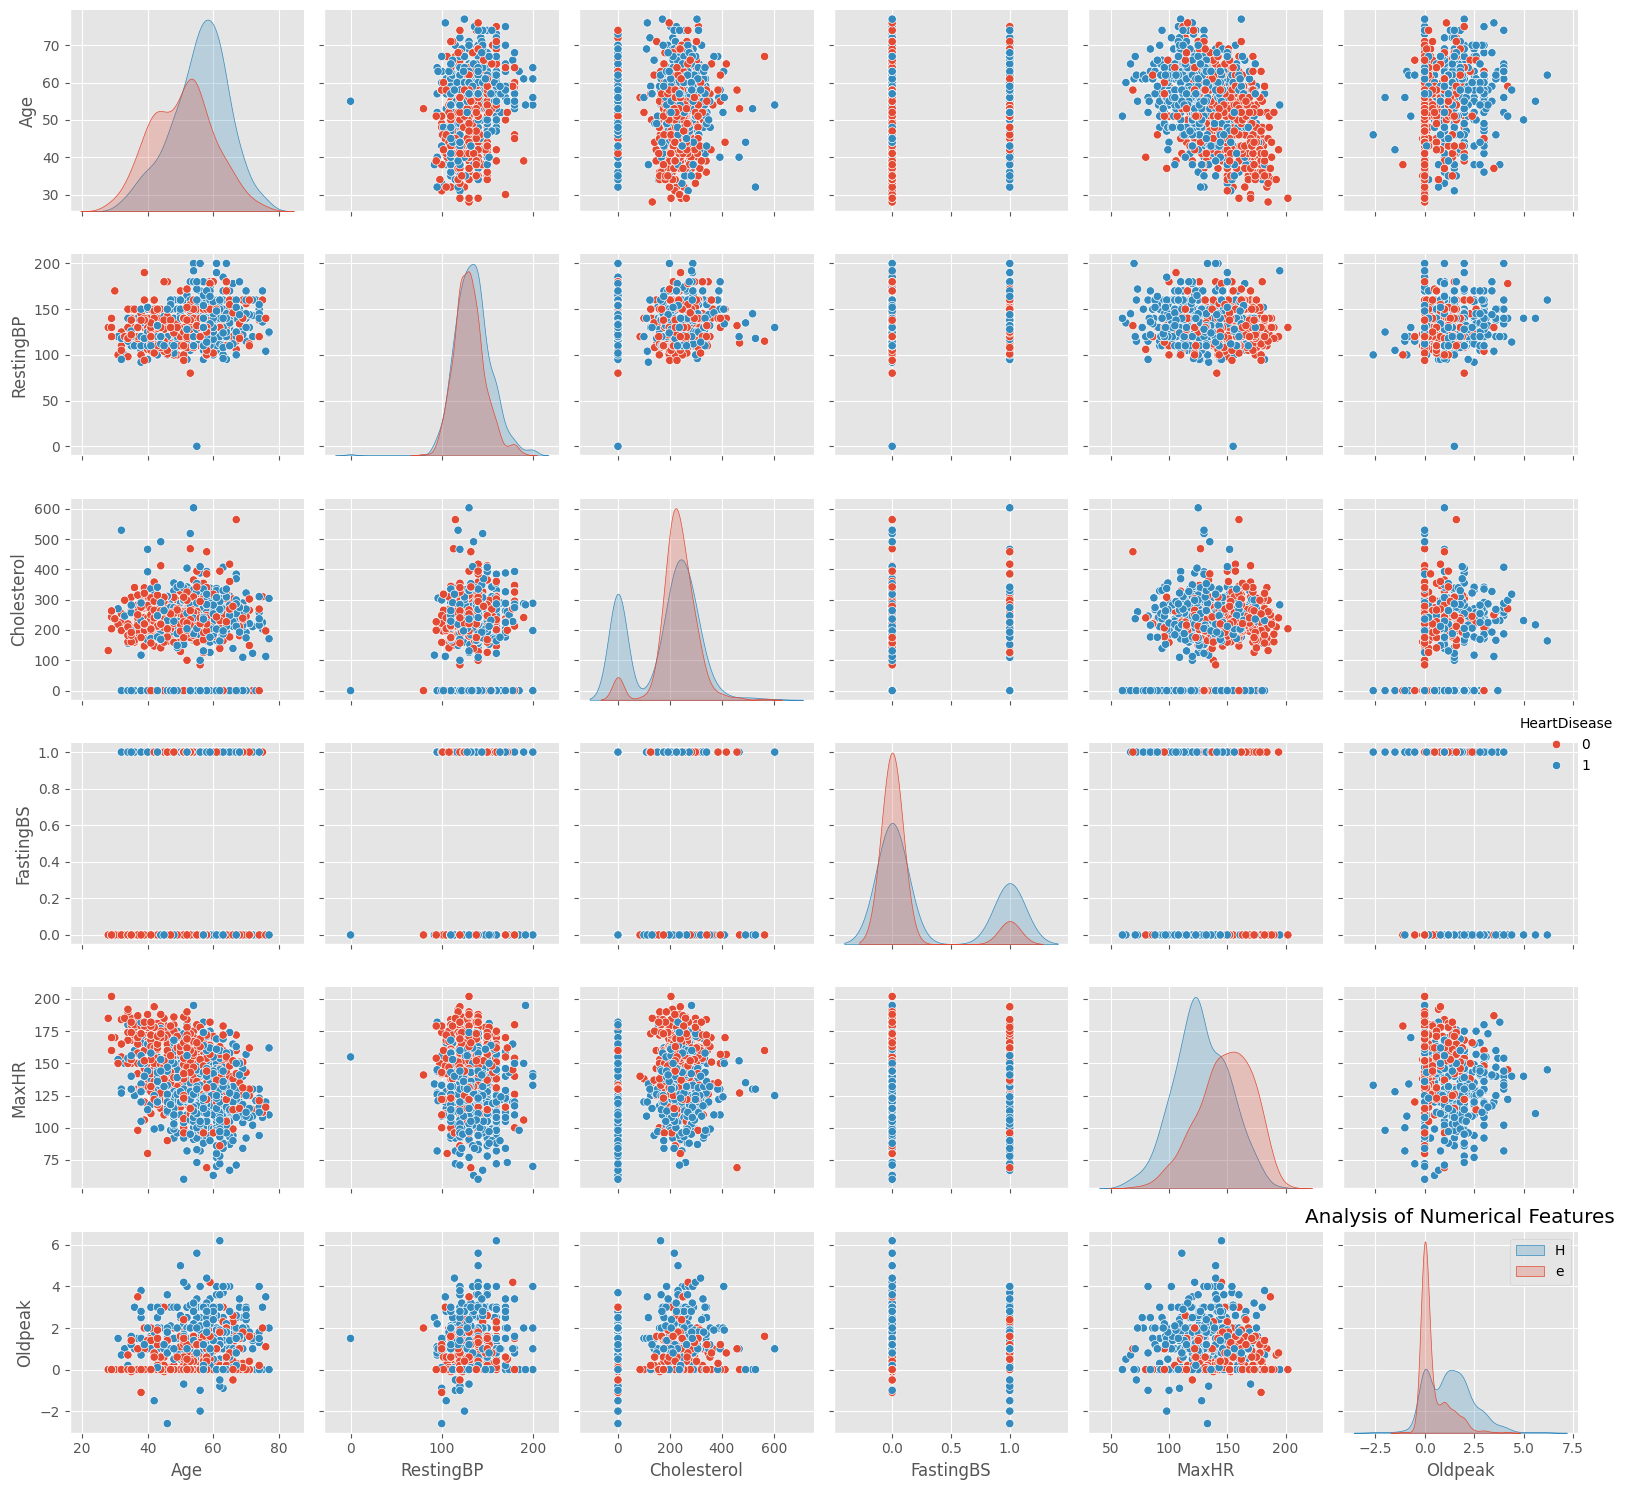

In [124]:
plt.figure(figsize=(15, 10))
sns.pairplot(data, hue="HeartDisease")
plt.title("Analysis of Numerical Features")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

#### Checking the box plot for the 5 numerical features for outliers and inconsistences.

In [125]:
fig = px.box(data, y="Age", title=f"Distribution of Age")
fig.show()

In [126]:
fig = px.box(data, y="RestingBP", title=f"Distribution of RestingBP")
fig.show()

In [127]:
fig = px.box(data, y="Cholesterol", title=f"Distribution of Cholesterol")
fig.show()

In [128]:
fig = px.box(data, y="Cholesterol", title=f"Distribution of Oldpeak")
fig.show()

In [129]:
fig = px.box(data, y="Oldpeak", title=f"Distribution of Oldpeak")
fig.show()

In [130]:
fig = px.box(data, y="MaxHR", title=f"Distribution of MaxHR")
fig.show()

#### Dealing with the Outliers

In [132]:
data_cleaned = data

print(numerical_columns)

for feature in numerical_columns:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_cleaned = data_cleaned[(data_cleaned[feature] >= lower_bound) & (data_cleaned[feature] <= upper_bound)]

# For demonstration purposes, we only picked one feature.
fig = px.box(data_cleaned, y="Oldpeak", title=f"Distribution of Oldpeak")
fig.show()

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


## 5. Feature Engineering & Selection

In this step, we extract the important features for our project.